In [1]:
#importing packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#reading the dataset
dataset=pd.read_csv('wine-quality.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
#shape of the dataset
print("Shape of my wine dataset:{s}".format(s=dataset.shape))
print("Column headers/names:{s}".format(s=list(dataset)))

Shape of my wine dataset:(1143, 13)
Column headers/names:['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
dataset.quality.value_counts().sort_index()

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

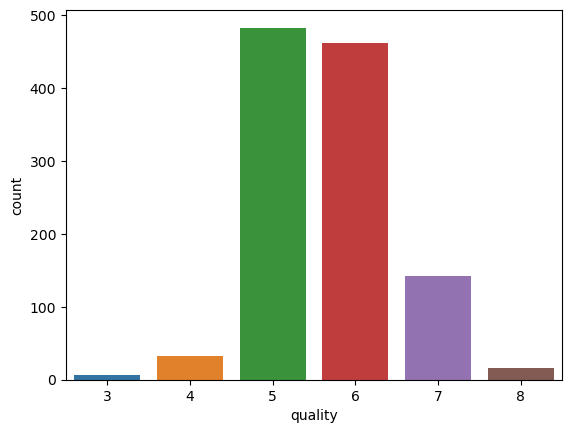

In [9]:
sns.countplot(x='quality',data=dataset)

In [10]:
dataset['alcohol'].describe()

count    1143.000000
mean       10.442111
std         1.082196
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [11]:
dataset['sulphates'].describe()

count    1143.000000
mean        0.657708
std         0.170399
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [12]:
dataset['citric acid'].describe()

count    1143.000000
mean        0.268364
std         0.196686
min         0.000000
25%         0.090000
50%         0.250000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [13]:
dataset['fixed acidity'].describe()

count    1143.000000
mean        8.311111
std         1.747595
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        15.900000
Name: fixed acidity, dtype: float64

In [14]:
dataset['residual sugar'].describe()

count    1143.000000
mean        2.532152
std         1.355917
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [15]:
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1
print(IQR)

fixed acidity             2.000000
volatile acidity          0.247500
citric acid               0.330000
residual sugar            0.700000
chlorides                 0.020000
free sulfur dioxide      14.000000
total sulfur dioxide     40.000000
density                   0.002275
pH                        0.195000
sulphates                 0.180000
alcohol                   1.600000
quality                   1.000000
Id                      798.500000
dtype: float64


In [16]:
#The part of data with False means their values are valid and True means the value is an outliers
outliers = (dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))
print(outliers)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1138          False             False        False           False      False   
1139          False             False        False           False      False   
1140          False             False        False           False      False   
1141          False             False        False           False      False   
1142          False             False        False           False      False   

      free sulfur dioxide  

In [17]:
dataset_out=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
dataset_out.shape

(834, 13)

In [18]:
dataset_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [19]:
correlations=dataset_out.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.117844
volatile acidity       -0.356948
citric acid             0.228060
residual sugar         -0.014981
chlorides              -0.190625
free sulfur dioxide    -0.001257
total sulfur dioxide   -0.209743
density                -0.208410
pH                     -0.042515
sulphates               0.417164
alcohol                 0.495364
Id                      0.120168
Name: quality, dtype: float64


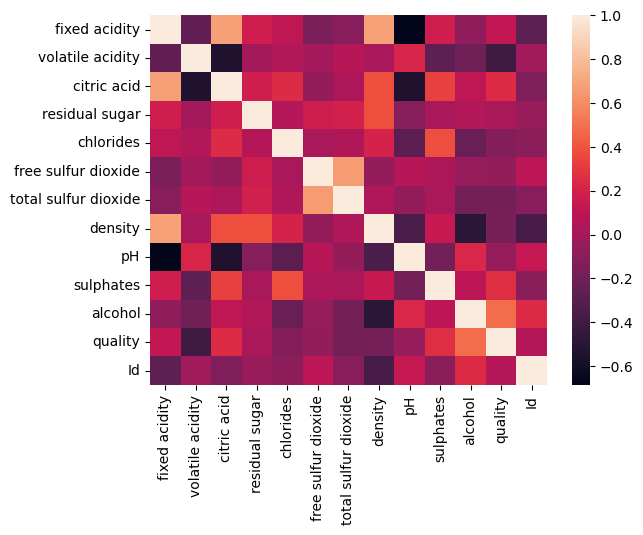

In [20]:
sns.heatmap(dataset.corr())
plt.show()

In [21]:
#impact of various factors on quality
correlations.sort_values(ascending=False)

alcohol                 0.495364
sulphates               0.417164
citric acid             0.228060
Id                      0.120168
fixed acidity           0.117844
free sulfur dioxide    -0.001257
residual sugar         -0.014981
pH                     -0.042515
chlorides              -0.190625
density                -0.208410
total sulfur dioxide   -0.209743
volatile acidity       -0.356948
Name: quality, dtype: float64

In [22]:
correlations.sort_values(ascending=False)

alcohol                 0.495364
sulphates               0.417164
citric acid             0.228060
Id                      0.120168
fixed acidity           0.117844
free sulfur dioxide    -0.001257
residual sugar         -0.014981
pH                     -0.042515
chlorides              -0.190625
density                -0.208410
total sulfur dioxide   -0.209743
volatile acidity       -0.356948
Name: quality, dtype: float64

In [23]:
correlations=dataset_out.corr()['quality'].drop('quality')
correlations.sort_values(ascending=False)

alcohol                 0.495364
sulphates               0.417164
citric acid             0.228060
Id                      0.120168
fixed acidity           0.117844
free sulfur dioxide    -0.001257
residual sugar         -0.014981
pH                     -0.042515
chlorides              -0.190625
density                -0.208410
total sulfur dioxide   -0.209743
volatile acidity       -0.356948
Name: quality, dtype: float64

In [24]:
def get_features(correlation_threshold):
    abs_corrs=correlations.abs()
    high_correlations=abs_corrs[abs_corrs>correlation_threshold].index.values.tolist()
    return high_correlations

In [25]:
features=get_features(0.05)
print(features)
x=dataset_out[features]
y=dataset_out['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'Id']


[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Alcohol'),
 Text(0.5, 1.0, 'Alcohol % in different samples')]

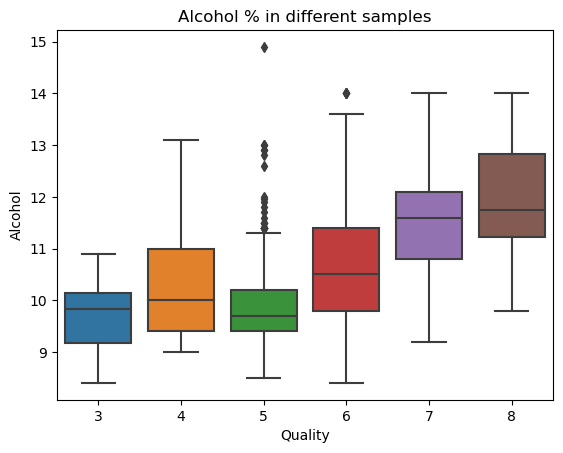

In [26]:
#finding number of outiers we have in our dataset with properties
bx=sns.boxplot(x='quality',y='alcohol',data=dataset)
bx.set(xlabel='Quality',ylabel='Alcohol',title='Alcohol % in different samples')

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 1.0, 'Citric Acid % in different samples')]

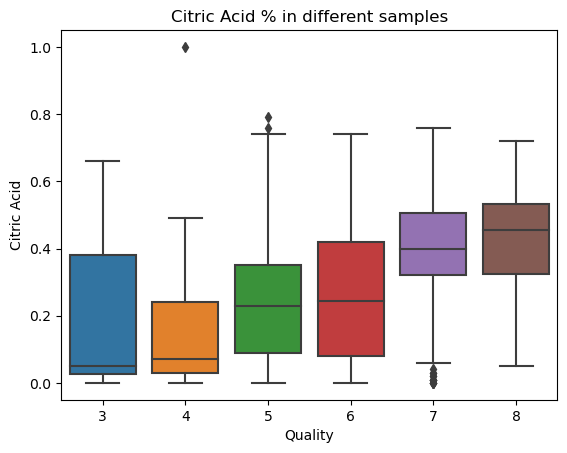

In [27]:
bx=sns.boxplot(x='quality',y='citric acid',data=dataset)
bx.set(xlabel='Quality',ylabel='Citric Acid',title='Citric Acid % in different samples')

In [28]:
print(x)

      fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1138            6.3             0.510         0.13      0.076   
1139            6.8             0.620         0.08      0.068   
1140            6.2             0.600         0.08      0.090   
1141            5.9             0.550         0.10      0.062   
1142            5.9             0.645         0.12      0.075   

      total sulfur dioxide  density  sulphates  alcohol    Id  
0                     34.0  0.99780       0.56      9.4     0  
1                     67.0  0.99680       0.68      9.8     1  
2                     54.0 

In [29]:
#Quality is plotted using variable y
print(y)

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 834, dtype: int64


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)

In [31]:
y_test.shape

(251,)

In [33]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [34]:
#to retrieve the intercept
regressor.intercept_

60.3816931418934

In [35]:
#gives coefficients of the 10 features selected above
regressor.coef_

array([ 5.92403427e-02, -6.43627871e-01,  4.45251603e-02, -5.23066142e-01,
       -1.77223144e-03, -5.83912346e+01,  1.64246674e+00,  2.37384290e-01,
       -9.34494049e-05])

In [36]:
train_pred=regressor.predict(x_train)
train_pred

array([5.68004776, 5.81549859, 5.67459388, 6.23598433, 5.31966146,
       5.24906974, 5.66485579, 5.45084624, 5.75058212, 5.47491384,
       5.19525988, 5.94619237, 5.77560627, 5.23472751, 6.30526704,
       6.11645251, 5.57561887, 5.80125866, 6.14509755, 6.53311134,
       5.03972554, 5.30262498, 5.33822388, 5.55477634, 5.27786492,
       5.03603731, 6.18170819, 5.4151824 , 5.56611578, 6.37765276,
       5.61938887, 5.5242898 , 5.11171725, 5.53401568, 5.99529956,
       5.78161755, 6.65572919, 5.5029931 , 5.35004327, 5.46880273,
       4.98599885, 5.42747825, 5.43795734, 6.09488125, 5.96689294,
       5.10576814, 5.06405661, 5.91628853, 5.04463314, 5.22255482,
       5.33855863, 5.80545902, 5.13170477, 5.11707834, 5.45941142,
       6.12179117, 5.72017198, 6.19859996, 6.58717431, 5.44335737,
       5.04625841, 5.79622546, 5.18736627, 5.33837173, 5.91666233,
       6.45329166, 5.83820483, 5.43024155, 6.34187912, 5.84752341,
       6.44157797, 5.55024328, 5.06630645, 5.40553214, 6.19847

In [37]:
test_pred=regressor.predict(x_test)
test_pred

array([5.50418619, 4.9522389 , 5.735495  , 6.1664573 , 5.78771127,
       5.31115462, 5.34482575, 5.89106022, 5.3162892 , 6.44185832,
       5.46003373, 5.38537491, 5.58311048, 5.35860222, 5.14061979,
       5.12216317, 5.5158106 , 5.39799703, 5.57781392, 5.37678368,
       5.09138021, 6.08136129, 5.5541553 , 5.4957033 , 6.09927431,
       5.34574995, 5.96679949, 5.34441921, 6.18168295, 5.80220203,
       5.40579936, 5.78978732, 5.3027651 , 5.94544149, 5.89770645,
       6.07461945, 5.29148342, 5.66711774, 5.87362095, 5.20981174,
       5.11544613, 5.07525802, 6.11444588, 6.02640534, 5.33176572,
       5.35461628, 5.16828154, 5.57534611, 5.69510336, 5.37881751,
       5.1593882 , 5.63854987, 6.31266084, 5.78107677, 5.37650333,
       5.86178774, 5.69117087, 5.52767741, 5.20043677, 5.4401957 ,
       5.15032149, 5.95082439, 5.85268433, 5.56469467, 4.90409663,
       5.54967503, 5.25552501, 5.63412188, 5.12689763, 5.68292815,
       5.70898069, 5.38694975, 5.35583022, 5.63861693, 6.33971

In [38]:
train_rmse=metrics.mean_squared_error(train_pred,y_train)**0.5
train_rmse

0.57289384635547

In [39]:
test_rmse=metrics.mean_squared_error(test_pred,y_test)**0.5
test_rmse

0.5193866686524748

In [40]:
#Rounding off the predicted value for the test set
predicted_data=np.round_(test_pred)
predicted_data

array([6., 5., 6., 6., 6., 5., 5., 6., 5., 6., 5., 5., 6., 5., 5., 5., 6.,
       5., 6., 5., 5., 6., 6., 5., 6., 5., 6., 5., 6., 6., 5., 6., 5., 6.,
       6., 6., 5., 6., 6., 5., 5., 5., 6., 6., 5., 5., 5., 6., 6., 5., 5.,
       6., 6., 6., 5., 6., 6., 6., 5., 5., 5., 6., 6., 6., 5., 6., 5., 6.,
       5., 6., 6., 5., 5., 6., 6., 6., 6., 6., 6., 6., 5., 6., 6., 5., 6.,
       6., 5., 6., 5., 6., 6., 5., 6., 6., 5., 5., 5., 6., 5., 5., 5., 6.,
       6., 5., 5., 5., 5., 5., 6., 5., 5., 6., 5., 5., 6., 6., 6., 6., 5.,
       5., 6., 6., 6., 6., 5., 5., 5., 6., 5., 6., 6., 5., 6., 7., 6., 6.,
       6., 6., 6., 7., 6., 6., 5., 5., 6., 5., 6., 6., 5., 5., 5., 5., 6.,
       5., 6., 5., 6., 6., 5., 6., 5., 6., 6., 6., 5., 5., 5., 5., 6., 6.,
       5., 6., 5., 7., 5., 6., 5., 5., 7., 5., 5., 6., 5., 6., 6., 6., 6.,
       5., 5., 6., 5., 5., 5., 5., 6., 6., 6., 5., 5., 5., 6., 6., 5., 6.,
       7., 5., 6., 5., 5., 6., 5., 6., 5., 5., 5., 5., 6., 5., 5., 6., 6.,
       5., 6., 7., 6., 5.

In [41]:
print("Mean absolute error = ",metrics.mean_absolute_error(y_test,test_pred))
print("Mean squared error = ",metrics.mean_squared_error(y_test,test_pred))
rmse=np.sqrt(metrics.mean_squared_error(y_test,test_pred))
print("Root mean squared error = ",rmse) 

Mean absolute error =  0.42244914614904744
Mean squared error =  0.2697625115739157
Root mean squared error =  0.5193866686524748


In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,test_pred)

0.4107444701592031

In [43]:
coefficients=pd.DataFrame(regressor.coef_,features)
coefficients.columns=['Coefficient']
coefficients

,Coefficient
fixed acidity,0.059240
volatile acidity,-0.643628
citric acid,0.044525
chlorides,-0.523066
total sulfur dioxide,-0.001772
density,-58.391235
sulphates,1.642467
alcohol,0.237384
Id,-0.000093


import matplotlib.pyplot as plt1
ax=plt1.axes()
color1='green'
color2='red'
ax.arrow(0,0,1,0.56,head_width=0.00,head_length=0,fc=color2,ec=color1)
ax.arrow(0,0,2,0.63,head_width=0.00,head_length=0.05,fc=color1,ec=color2,linestyle='--')
ax.set_ylim([0,0.8])
ax.set_xlim([0,4])
plt.grid()
plt.title('RMSE_SCORE')
plt1.show()

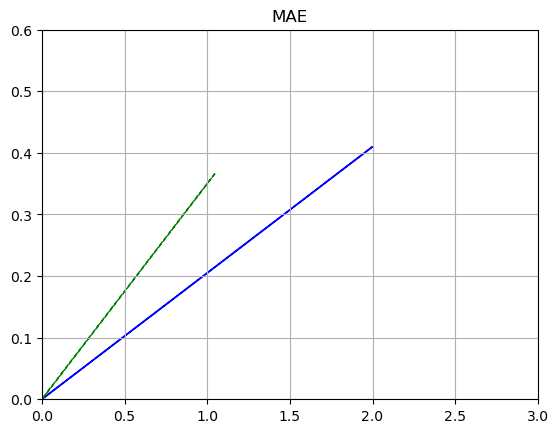

In [46]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1='green'
color2='blue'
ax.arrow(0,0,2,0.41,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,1,0.35,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('MAE')
plt1.show()